In [37]:
# importing required librares
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB


In [38]:
df=pd.read_csv("Fertilizer_Prediction.csv")

In [39]:
df.sample(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
78,26,52,36,Clayey,Pulses,7,16,20,10-26-26
51,36,68,33,Black,Oil seeds,13,0,14,20-20
59,32,62,34,Red,Ground Nuts,15,0,37,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
64,27,53,35,Black,Oil seeds,37,0,0,Urea


In [40]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [43]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [44]:
df["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [45]:
le=LabelEncoder()
df['Crop Type']=le.fit_transform(df['Crop Type'])

In [46]:
df['Crop Type'].unique()

array([ 3,  8,  1,  9,  6,  0, 10,  4,  5,  7,  2])

In [47]:
le=LabelEncoder()
df['Soil Type']=le.fit_transform(df['Soil Type'])

In [48]:
df["Soil Type"].unique()

array([4, 2, 0, 3, 1])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     int64 
 4   Crop Type        99 non-null     int64 
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(8), object(1)
memory usage: 7.1+ KB


In [50]:
df.corr(numeric_only=True)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,0.036595,0.135211,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,0.061744,0.130019,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.053386,-0.155281,-0.095945,0.027727,0.009276
Soil Type,0.036595,0.061744,-0.053386,1.000000,-0.311288,-0.159595,0.065460,0.205794
Crop Type,0.135211,0.130019,-0.155281,-0.311288,1.000000,0.071803,0.025838,-0.187574
Nitrogen,-0.033771,-0.060646,-0.095945,-0.159595,0.071803,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,0.065460,0.025838,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,0.205794,-0.187574,-0.686971,0.089192,1.000000


<Axes: >

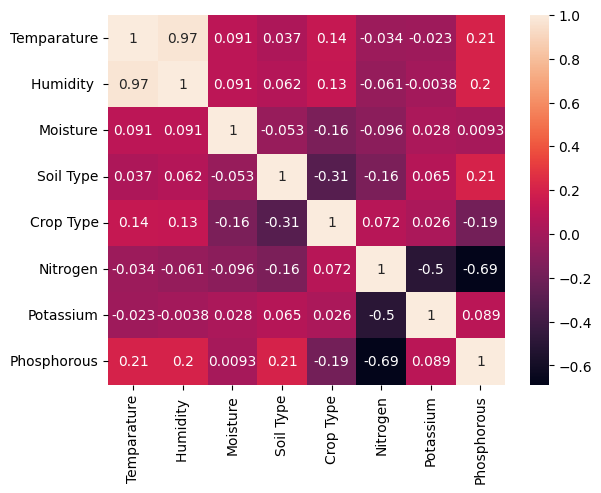

In [51]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [65]:
df = df.drop(df.columns[1], axis=1)

<Axes: >

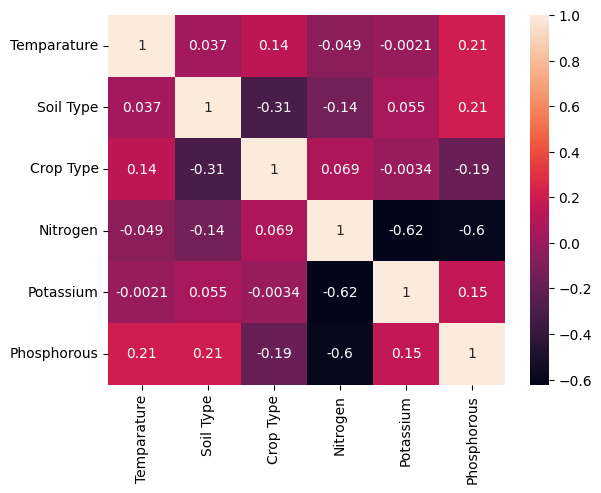

In [66]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: ylabel='Temparature'>

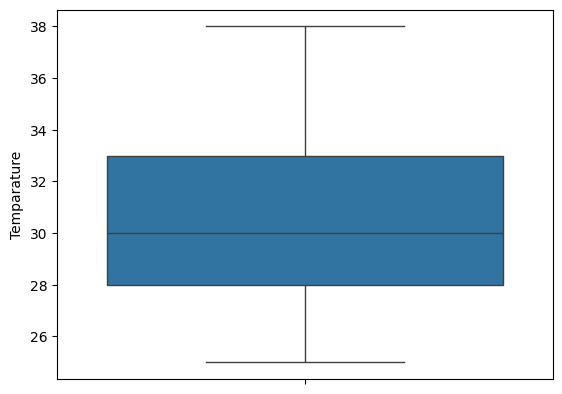

In [67]:
sns.boxplot(y=df['Temparature'])

<Axes: ylabel='Nitrogen'>

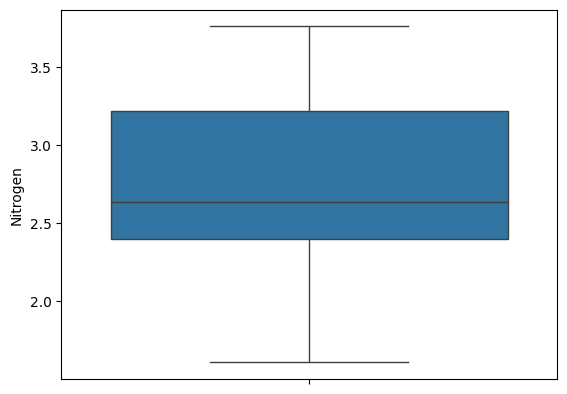

In [68]:
sns.boxplot(y=df['Nitrogen'])

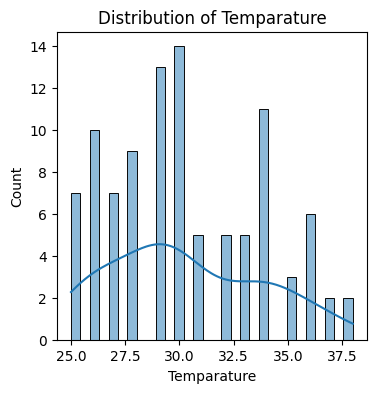

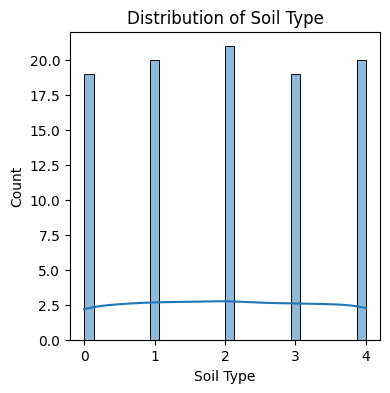

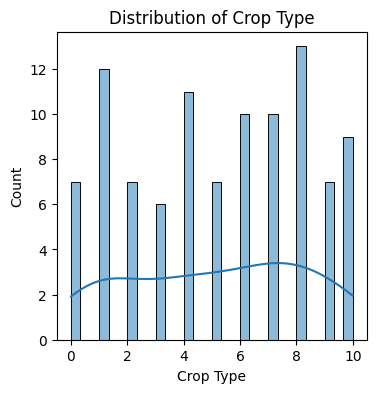

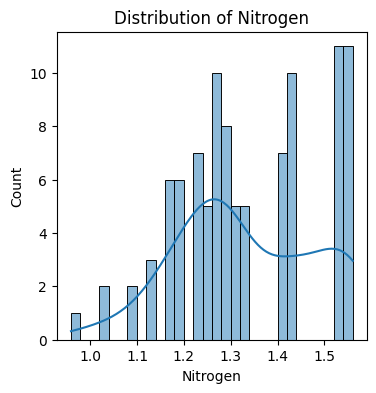

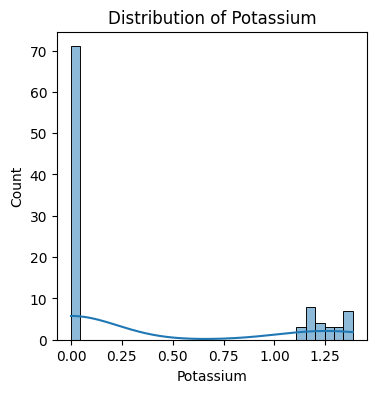

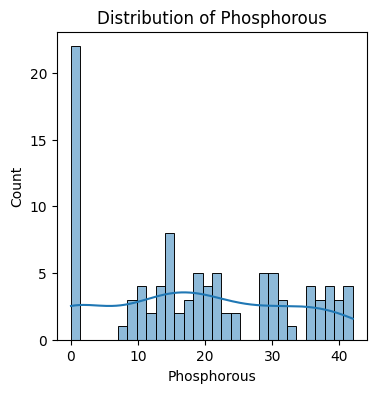

In [98]:
for col in df.columns[:-1]:
    plt.figure(figsize=(4,4))
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [71]:
df.skew(numeric_only=True)

Temparature    0.352439
Soil Type      0.004049
Crop Type     -0.106478
Nitrogen       0.214630
Potassium      1.045753
Phosphorous    0.076162
dtype: float64

In [72]:
df['Nitrogen'] = np.log1p(df['Nitrogen'])
df['Potassium'] = np.log1p(df['Potassium'])

In [73]:
df.skew(numeric_only=True)

Temparature    0.352439
Soil Type      0.004049
Crop Type     -0.106478
Nitrogen      -0.029368
Potassium      1.001047
Phosphorous    0.076162
dtype: float64

<Axes: >

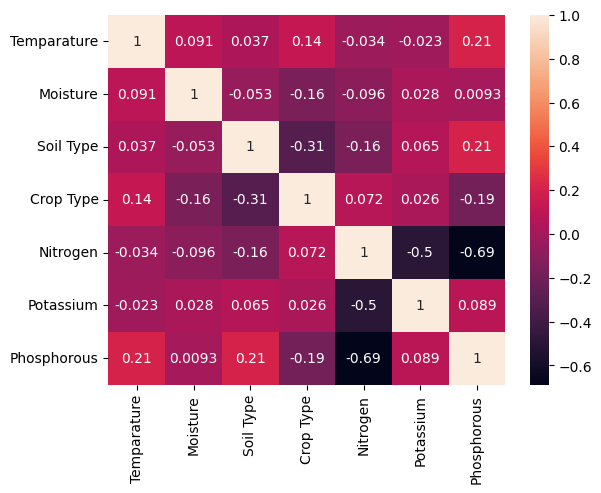

In [74]:
sns.heatmap(x.corr(numeric_only=True),annot=True)

In [75]:
x = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [76]:
le=LabelEncoder()
y=le.fit_transform(y)

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

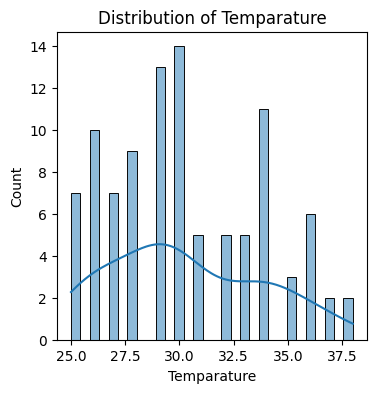

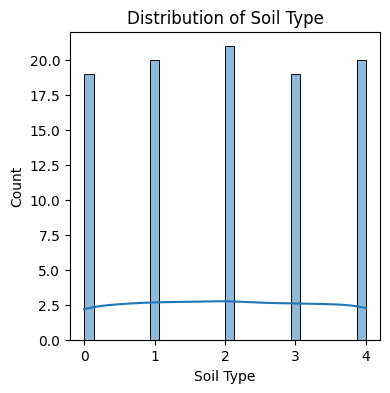

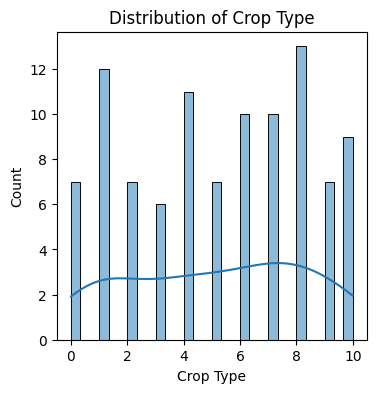

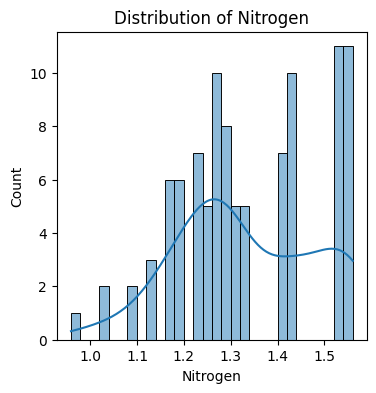

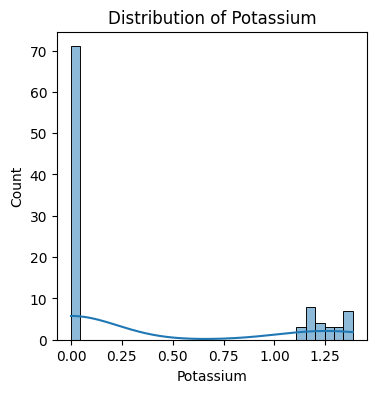

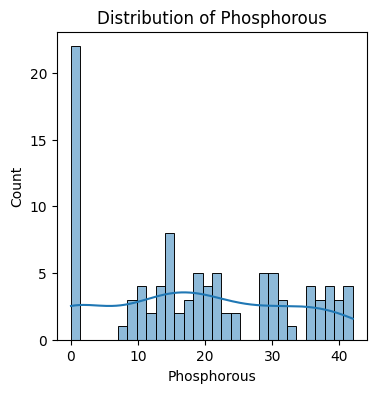

In [97]:
for col in x.columns:
    plt.figure(figsize=(4,4))
    sns.histplot(x[col],kde=True,bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [78]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


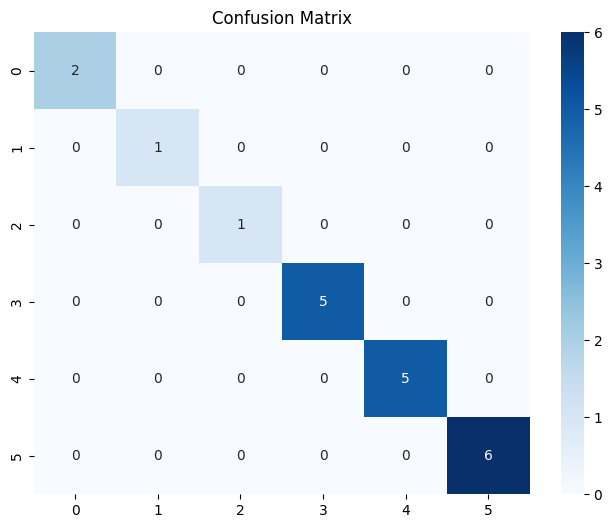

In [90]:
# traning my model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
accuracy_score(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

accuracy= 1.0


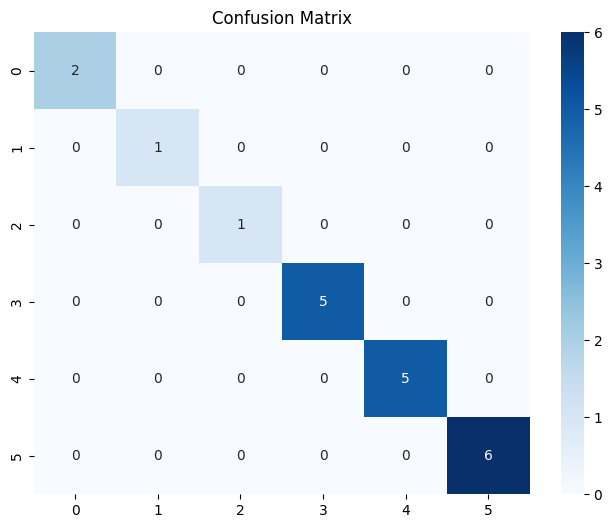

In [92]:
# random forest
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("accuracy=",accuracy_score(y_test,y_pred))
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [85]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, x_train, y_train, cv=10, scoring='accuracy')
print(scores)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.85714286]


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


accuracy= 0.8


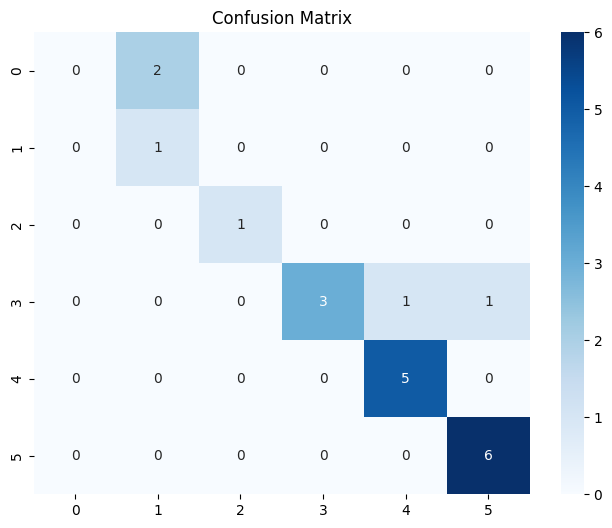

In [96]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("accuracy=",accuracy_score(y_test,y_pred)) 
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

accuracy= 0.95


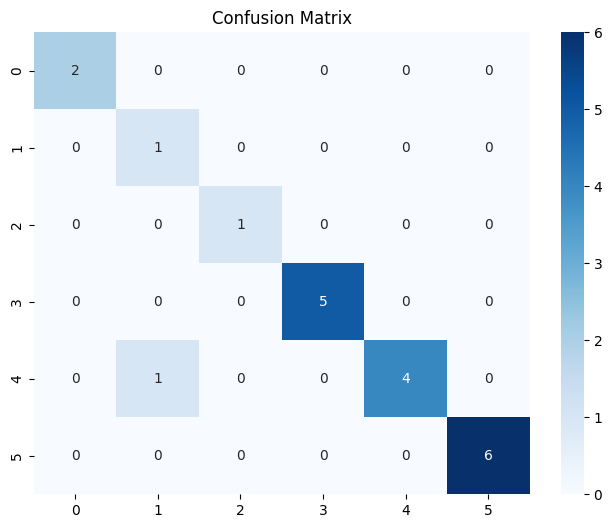

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
gc.fit(x_train,y_train)
y_pred=gc.predict(x_test)
print("accuracy=",accuracy_score(y_test,y_pred)) 
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()